

**Access to Drive**

In [1]:
#TO DO mount drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Download Dataset***




**Training Dataset**


In [2]:
import pandas as pd

path = 'drive/My Drive/Colab Notebooks/dankmemes/Dataset/'
csv_data = pd.read_csv(path + 'dankmemes_task_1/dankmemes_task1_train.csv')
embedd_image_train_temp = pd.read_csv(path + 'dankmemes_task_1/dankmemes_task1_train_embeddings.csv')
csv_data = csv_data[["Engagement", "Manipulation", "Visual", "Text", "Meme"]] 

x_train_text_raw = csv_data['Text']
temp_engagement_column_train = csv_data['Engagement']
manipulation_column_train = csv_data['Manipulation']
temp_visual_column_train = csv_data['Visual']

y_train = csv_data["Meme"]

csv_data.head()

,Engagement,Manipulation,Visual,Text,Meme
0,11,1,Salvini,satira cruda votaci.. saremo di parola il part...,1
1,2261,0,0,"peccato per le accise, dai. c'eravamo quasi.",0
2,1327,0,"Salvini, Di Maio","""che c'è ancora?"" ""aspetto un bambino""",1
3,18,0,0,ora in onda speciale gr1 ascolta la diretta se...,0
4,617,0,"Salvini, Di Maio",sta sciocchezza che sto pe fa e solo colpa tua,1


**Train Images**

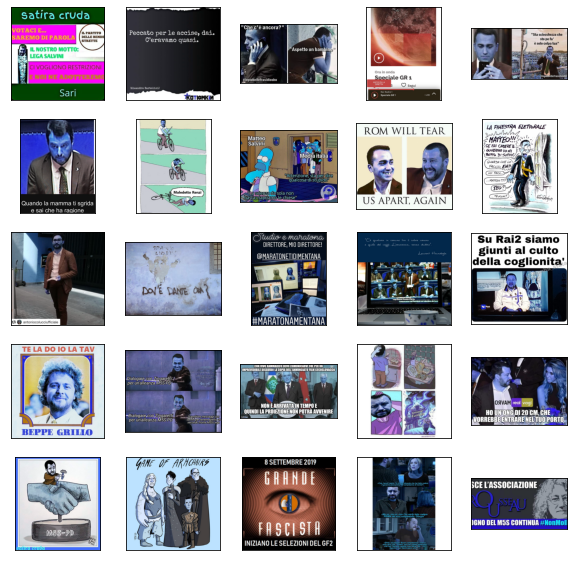

In [3]:

import matplotlib.pyplot as plt
import cv2
import os

images_path = path + "dankmemes_task_1/images_task1_train/"

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = cv2.imread(images_path + str(i) + ".jpg")
    plt.imshow(img, cmap=plt.cm.binary)
plt.show()


**Test Dataset**


In [4]:
csv_data_test = pd.read_csv(path+"1_test/meme_test.csv")
embedd_image_test_temp = pd.read_csv(path + '1_test/1_test_embeddings.csv')
csv_data_test = csv_data_test[["Engagement", "Manipulation", "Visual", "Text", "Meme"]] 

x_test_text_raw = csv_data_test['Text']
temp_engagement_column_test = csv_data_test['Engagement']
manipulation_column_test = csv_data_test['Manipulation']
temp_visual_column_test = csv_data_test['Visual']

y_test = csv_data_test["Meme"]

csv_data_test.head()

,Engagement,Manipulation,Visual,Text,Meme
0,583,0,0,"governo, la mezza marcia indietro di salvini ""...",1
1,10,1,Salvini,l'unico posto dove tutti possono avere pieni p...,1
2,3,0,0,dopo tanto lavoro si ritorna alle chiacchiere....,0
3,239,0,0,mattarella di maio renzi salvini again? seriou...,1
4,13,0,Conte,ho una montagna di cosa fa fare... ma preferis...,0


**Test Images**

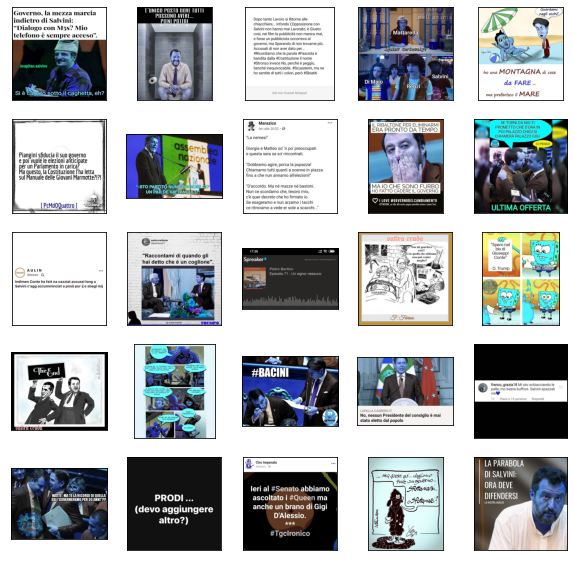

In [5]:
images_path_test = path + "1_test/1_test_img/"

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = cv2.imread(images_path_test + str(i+4000) + ".jpg")
    plt.imshow(img, cmap=plt.cm.binary)
plt.show()

# **Preprocessing**

**Visual Preprocessing**

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

visual_column = np.concatenate((temp_visual_column_train, temp_visual_column_test))

unique = []

for x in range(len(visual_column)):
  visual_column[x] = visual_column[x].split(', ')
  for k in range(len(visual_column[x])):    
    visual_column[x][k] = visual_column[x][k].lower()

    if len(visual_column[x][k].split(',')) > 1:
      if visual_column[x][k].split(',')[0] != "":
        visual_column[x][k] = visual_column[x][k].split(',')[0]
      else:
        visual_column[x][k] = visual_column[x][k].split(',')[0]

    if visual_column[x][k] not in unique:
      if visual_column[x][k] != "0":
        unique.append(visual_column[x][k])

print("List all of different names:")
print(unique)

visual_column_train = np.zeros((len(temp_visual_column_train), len(unique)))
visual_column_test = np.zeros((len(temp_visual_column_test), len(unique)))
x_visual_test = np.zeros((len(temp_visual_column_test) - 1, len(unique)))

for x in range(len(visual_column)):
  for item in visual_column[x]:
    if item != "0":
      if x < len(temp_visual_column_train):
        visual_column_train[x][unique.index(item)] = 1
      else:
        visual_column_test[x-len(temp_visual_column_train)][unique.index(item)] = 1
        if  x > len(temp_visual_column_train):
          x_visual_test[x-len(temp_visual_column_train) - 1][unique.index(item)] = 1

# x_visual_test = pd.DataFrame(x_visual_test, dtype='int64')

# print()
# visual_column_train = pd.DataFrame(visual_column_train, dtype='int64')
# visual_column_test = pd.DataFrame(visual_column_test, dtype='int64')

print("Visual Training Column:")
print(visual_column_train)
print(len(visual_column_train[1]))
print("")
print("Visual Test Column:")
print(visual_column_test)
print(len(visual_column_test))

List all of different names:
['salvini', 'di maio', 'grillo', 'mattarella', 'conte', 'zingaretti', 'meloni', 'casaleggio', 'toninelli', 'giorgetti', 'boschi', 'cirinnà', 'berlusconi', 'renzi', 'napolitano', 'monti', 'draghi', 'm5s', 'casalino', 'appendino', 'civati', 'pd', 'lega', "fratelli d'italia", 'forza italia', 'di battista', 'fico', 'bellanova', "d'uva", 'mentana', 'gentiloni', 'delrio', 'putin', 'bossi', 'belsito', 'rosy bindi', 'vendola', 'santanchè', 'gelmini', 'casini', 'minetti', 'giannino', 'merkel', 'adinolfi', "d'alema", 'prodi', 'cuperlo', 'fdi', 'bussetti', 'de magistris', 'del rio', 'tria', 'fornero', 'bonafede', 'taverna', 'letta', 'giovanardi', 'pertini', 'bernini', 'tajani', 'casellati', 'sinistra unita', 'verdini', 'grasso', 'bagnasco']
Visual Training Column:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
65

Visual Test Column:
[[0. 0. 0. ... 0. 0. 0.]
 [

**Manipulation preprocessing**

In [7]:
x_manipulation_test = np.zeros(len(manipulation_column_test) - 1)


for i in range(len(manipulation_column_test)):
  if i > 0:
    x_manipulation_test[i-1] = manipulation_column_test[i]

manipulation_column_train = np.asarray(manipulation_column_train)
manipulation_column_test = np.asarray(manipulation_column_test)
x_manipulation_test = np.asarray(x_manipulation_test)

print(manipulation_column_train.shape)
print(x_manipulation_test.shape)

(1600,)
(399,)


**Engagment Preprocessing**

In [8]:
engagement_column = (np.concatenate((temp_engagement_column_train , temp_engagement_column_test)))
max_engage = float(max(engagement_column))

engagement_column_train = []
engagement_column_test = []
x_engagement_test = []

for x in range(len(engagement_column)):
  temp = engagement_column[x] / max_engage
  if x < len(temp_engagement_column_train):
    engagement_column_train.append(temp)
  else:
    engagement_column_test.append(temp)
    if  x > len(temp_engagement_column_train):
        x_engagement_test.append(temp)


engagement_column_train = np.asarray(engagement_column_train)
engagement_column_test = np.asarray(engagement_column_test)
x_engagement_test =np.asarray(x_engagement_test)

print(x_engagement_test.shape)
print("Train Engagement:")
print(engagement_column_train.shape)
print("Test Engagement:")
print(engagement_column_test.shape)

(399,)
Train Engagement:
(1600,)
Test Engagement:
(400,)


**Train Images Preprocessing**

In [9]:

dirs = os.listdir(images_path)

train_images = [0 for x in range(len(dirs))]

for item in dirs:
    img = cv2.imread(images_path + item)
    current_image = cv2.resize(img, dsize=(200, 200), interpolation=cv2.INTER_CUBIC)
    # current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
    data = current_image.astype('float32')
    train_images[int(item.split(".")[0])] = data

train_images = np.asarray(train_images)
train_images = train_images / 255.0

print(train_images.shape)
print(type(train_images))


(1600, 200, 200, 3)
<class 'numpy.ndarray'>


**Embedding Image Train Preprocessing**

In [10]:
embedd_image_train_temp = np.asarray(embedd_image_train_temp)

embedd_image_train = [row[1].split(" ") for row in embedd_image_train_temp]
embedd_image_train = np.asarray(embedd_image_train)
embedd_image_train = embedd_image_train.astype('float32')

    
print(embedd_image_train.dtype)
print(embedd_image_train.shape)
# print(embedd_image_train)

float32
(1600, 2048)


**Test Images Preprocessing**

In [11]:

dirs = os.listdir(images_path_test)

test_images = [0 for x in range(len(dirs))]

for item in dirs:
    img = cv2.imread(images_path_test + item)
    current_image = cv2.resize(img, dsize=(200, 200), interpolation=cv2.INTER_CUBIC)	
    # current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
    data = current_image.astype('float32')    
    test_images[int(item.split(".")[0]) - 4000] = data

test_images = np.asarray(test_images)
test_images = test_images / 255.0

print(test_images.shape)

(400, 200, 200, 3)


**Embedding Image Test Preprocessing**

In [12]:
embedd_image_test_temp = np.asarray(embedd_image_test_temp)

embedd_image_test = [row[1].split(" ") for row in embedd_image_test_temp]
embedd_image_test = np.asarray(embedd_image_test)
embedd_image_test = embedd_image_test.astype('float32')
y_test_embedd = np.zeros(len(y_test)-1)

for i in range(len(y_test)):
  if i > 0:
    y_test_embedd[i-1] = int(y_test[i])

# y_test_embedd = y_test_embedd.astype(np.int)

print(y_test.shape)
print(y_test_embedd.shape)
print(len(embedd_image_test))
print(embedd_image_test.dtype)
print(embedd_image_test.shape)

(400,)
(399,)
399
float32
(399, 2048)


**Concatenate Features**

In [13]:
x_train_features = np.zeros((1600,67))
x_test_features = np.zeros((400,67))
x_test_features_embedd = np.zeros((399,67))

for i in range(len(x_train_features)):
  for k in range(len(x_train_features[i])):
    if k == 0:
      x_train_features[i][k] = engagement_column_train[i]
    if k == 1:
      x_train_features[i][k] = manipulation_column_train[i]
    if k > 1:
      x_train_features[i][k] = visual_column_train[i][k - 2]


for i in range(len(x_test_features)):
  for k in range(len(x_test_features[i])):
    if k == 0:
      x_test_features[i][k] = engagement_column_test[i]
    if k == 1:
      x_test_features[i][k] = manipulation_column_test[i]
    if k > 1:
      x_test_features[i][k] = visual_column_test[i][k - 2]


for i in range(len(x_test_features_embedd)):
  for k in range(len(x_test_features_embedd[i])):
    if k == 0:
      x_test_features_embedd[i][k] = x_engagement_test[i]
    if k == 1:
      x_test_features_embedd[i][k] = x_manipulation_test[i]
    if k > 1:
      x_test_features_embedd[i][k] = x_visual_test[i][k - 2]


print(x_train_features.shape)

print(x_test_features.shape)

print(x_test_features_embedd.shape)


(1600, 67)
(400, 67)
(399, 67)


**Text Preprocessing**

In [14]:
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as pyplot

text_data_raw_train = np.array(x_train_text_raw)
text_data_raw_test = np.array(x_test_text_raw)
text_data_raw = np.concatenate((text_data_raw_train, text_data_raw_test))


tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(text_data_raw)
text_data = tokenizer.texts_to_sequences(text_data_raw)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

x_train_text = text_data[0:1600]
x_test_text = text_data[1600:2000]
x_test_text_embedd = text_data[1601:2000]

max_len = 0
sum_len = 0
count = 0

for item in x_train_text:
  if len(item) > 50:
      count = count + 1
  if len(item) > max_len:
    max_len = len(item)
  sum_len = sum_len + len(item)

print(max_len)
avg_lenghts = sum_len / len(x_train_text)
print("average: " + str(avg_lenghts))
print("Number of lenghts of text > mean: " + str(count) + " the " + str(count*100/len(x_train_text)) + "% of the total")

text_data_max_length = 50
x_train_text = keras.preprocessing.sequence.pad_sequences(sequences=x_train_text, maxlen=text_data_max_length, padding='post')
x_test_text = keras.preprocessing.sequence.pad_sequences(sequences=x_test_text, maxlen=text_data_max_length, padding='post')
x_test_text_embedd = keras.preprocessing.sequence.pad_sequences(sequences=x_test_text_embedd, maxlen=text_data_max_length, padding='post')

print("Train Text: " + str(x_train_text.shape))
print("Test Text: " + str(x_test_text.shape))
print(max_len)

7577
153
average: 15.8275
Number of lenghts of text > mean: 40 the 2.5% of the total
Train Text: (1600, 50)
Test Text: (400, 50)
153


**Embedding Matrix**

In [15]:
import io

fname = "drive/My Drive/Colab Notebooks/dankmemes/cc.it.300.vec"


# https://fasttext.cc/docs/en/crawl-vectors.html

embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))
embedding_matrix2 = np.zeros((vocab_size, embedding_dim))
with open(fname, encoding='utf8') as f:
        for line in f:
            word, *vector = line.split()
            if word in tokenizer.word_index:
                idx = tokenizer.word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
print(type(embedding_matrix))
print(embedding_matrix.shape)
print(embedding_matrix)

# Check non zero elements
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))



<class 'numpy.ndarray'>
(7577, 300)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.0209     -0.0453      0.24330001 ... -0.0775      0.0412
   0.1437    ]
 [-0.0217     -0.0187      0.0904     ... -0.0673      0.0854
  -0.0063    ]
 ...
 [-0.0009     -0.1356      0.008      ... -0.054       0.0157
   0.0327    ]
 [-0.0061     -0.0266      0.0313     ... -0.0153     -0.0501
   0.0177    ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


# **Build, train and test of the Models**

In [16]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import sklearn
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.model_selection import KFold
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

import mlxtend                     


########################################

**Image Model**

########################################

**Build Image Model 1**


In [17]:
kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train, test in kfold.split(train_images):

  input_images = keras.layers.Input(shape=(200, 200, 3), name='images')

  y = keras.layers.Conv2D(32, (3,3), activation='relu')(input_images)
  y = keras.layers.MaxPool2D(3,3)(y)
  y =  keras.layers.Dropout(0.25)(y)

  y = keras.layers.Conv2D(32, (3,3), activation='relu')(y)
  y = keras.layers.MaxPool2D(3,3)(y)
  y = keras.layers.Dropout(0.25)(y)

  y = keras.layers.Conv2D(64, (3,3), activation='relu')(y)
  y = keras.layers.MaxPool2D(6)(y)
  y =  keras.layers.Dropout(0.25)(y)

  images_features = keras.layers.Flatten()(y)

  dense = keras.layers.Dense(64)(images_features)
  dense = keras.layers.Dropout(0.25)(dense)
  dense = keras.layers.Dense(4)(dense)
  dense = keras.layers.Dense(1)(dense)
  acti = keras.layers.Activation('sigmoid')(dense)

  func_model_images_1 = keras.Model(input_images, acti)


  if fold_no == 1:
    func_model_images_1.summary()
    
    print('------------------------------------------------------------------------')



  func_model_images_1.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  
  fold_n = "/fold" + str(fold_no)
  checkpoint_filepath = path + '/tmp/checkpoint_img_1' + fold_n

  metric = 'val_accuracy'
  callback = keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor=metric, mode='max', verbose=1, save_best_only=True)


  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history_1_1 = func_model_images_1.fit(
    x=train_images[train],
    y=y_train[train],
    epochs=25, verbose='auto', 
    validation_data=(train_images[test], y_train[test]), callbacks=[callback])
  
  scores = func_model_images_1.evaluate(train_images[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {func_model_images_1.metrics_names[0]} of {scores[0]}; {func_model_images_1.metrics_names[1]} of {scores[1]}%')
  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 images (InputLayer)         [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 66, 66, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 66, 66, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                         

**Cross Validation Image Model 1** 

In [18]:

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')



------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.5427683591842651 - Accuracy: 0.753125011920929
------------------------------------------------------------------------
> Fold 2 - Loss: 0.48359426856040955 - Accuracy: 0.7875000238418579
------------------------------------------------------------------------
> Fold 3 - Loss: 0.5798927545547485 - Accuracy: 0.7250000238418579
------------------------------------------------------------------------
> Fold 4 - Loss: 0.512194037437439 - Accuracy: 0.737500011920929
------------------------------------------------------------------------
> Fold 5 - Loss: 0.563015341758728 - Accuracy: 0.75
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.7506250143051147 (+- 0.02095381961897382)
> Loss: 0.536292952299118
--------------------------------------------

############################################################

**Build Image Model 2**


In [19]:
kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train, test in kfold.split(train_images):

  input_images = keras.layers.Input(shape=(200, 200, 3), name='images')

  y = keras.layers.Conv2D(64, 2, activation='relu')(input_images)
  y = keras.layers.MaxPool2D(8)(y)

  y = keras.layers.Conv2D(128, 2, activation='relu')(y)
  y = keras.layers.MaxPool2D(8)(y)
  y = keras.layers.Dropout(0.3)(y)

  images_features = keras.layers.Flatten()(y)

  dense = keras.layers.Dense(128)(images_features)
  dense = keras.layers.Dropout(0.3)(dense)

  dense = keras.layers.Dense(16)(images_features)
  dense = keras.layers.Dropout(0.3)(dense)

  dense = keras.layers.Dense(1)(dense)

  acti = keras.layers.Activation('sigmoid')(dense)

  func_model_images_2 = keras.Model(input_images, acti)


  if fold_no == 1:
    func_model_images_2.summary()
    
    print('------------------------------------------------------------------------')



  func_model_images_2.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  
  fold_n = "/fold" + str(fold_no)
  checkpoint_filepath = path + '/tmp/checkpoint_img_2' + fold_n

  metric = 'val_accuracy'
  callback = keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor=metric, mode='max', verbose=1, save_best_only=False)


  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history_1_2 = func_model_images_2.fit(
    x=train_images[train],
    y=y_train[train],
    epochs=20, verbose='auto', 
    validation_data=(train_images[test], y_train[test]), callbacks=[callback])
  
  scores = func_model_images_2.evaluate(train_images[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {func_model_images_2.metrics_names[0]} of {scores[0]}; {func_model_images_2.metrics_names[1]} of {scores[1]}%')
  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1



Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 images (InputLayer)         [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 199, 199, 64)      832       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 23, 23, 128)       32896     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 2, 2, 128)        0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 2, 2, 128)         0   

**Cross Validation Image Model 2** 

In [20]:

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')



------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.5168489217758179 - Accuracy: 0.737500011920929
------------------------------------------------------------------------
> Fold 2 - Loss: 0.5561203360557556 - Accuracy: 0.7281249761581421
------------------------------------------------------------------------
> Fold 3 - Loss: 0.5766714811325073 - Accuracy: 0.7281249761581421
------------------------------------------------------------------------
> Fold 4 - Loss: 0.5161513090133667 - Accuracy: 0.7718750238418579
------------------------------------------------------------------------
> Fold 5 - Loss: 0.5450651049613953 - Accuracy: 0.762499988079071
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.7456249952316284 (+- 0.01817881225263643)
> Loss: 0.5421714305877685
----------------------------

########################################################

**Build Image Model 3**


In [78]:

kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train, test in kfold.split(embedd_image_train):

  input_images = keras.layers.Input(shape=(2048), name='images')

  dense = keras.layers.Dropout(0.7)(input_images)
  dense = keras.layers.Dense(64)(dense)
  dense = keras.layers.Dropout(0.3)(dense)

  dense = keras.layers.Dense(1)(dense)

  acti = keras.layers.Activation('sigmoid')(dense)

  func_model_images_3 = keras.Model(input_images, acti)

  if fold_no == 1:
    func_model_images_3.summary()
    
    print('------------------------------------------------------------------------')



  func_model_images_3.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  
  fold_n = "/fold" + str(fold_no)
  checkpoint_filepath = path + '/tmp/checkpoint_img_3' + fold_n

  metric = 'val_accuracy'
  callback = keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor=metric, mode='max', verbose=1, save_best_only=True)


  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history_1_3 = func_model_images_3.fit(embedd_image_train[train],y_train[train],
    validation_data=(embedd_image_train[test],y_train[test]),
    epochs=50, verbose='auto', 
    callbacks=[callback])
  
  scores = func_model_images_3.evaluate(embedd_image_train[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {func_model_images_3.metrics_names[0]} of {scores[0]}; {func_model_images_3.metrics_names[1]} of {scores[1]}')
  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1



Model: "model_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 images (InputLayer)         [(None, 2048)]            0         
                                                                 
 dropout_161 (Dropout)       (None, 2048)              0         
                                                                 
 dense_213 (Dense)           (None, 64)                131136    
                                                                 
 dropout_162 (Dropout)       (None, 64)                0         
                                                                 
 dense_214 (Dense)           (None, 1)                 65        
                                                                 
 activation_99 (Activation)  (None, 1)                 0         
                                                                 
Total params: 131,201
Trainable params: 131,201
Non-traina

**Cross Validation Image model 3** 

In [79]:


print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.5168780088424683 - Accuracy: 0.7281249761581421
------------------------------------------------------------------------
> Fold 2 - Loss: 0.48142433166503906 - Accuracy: 0.762499988079071
------------------------------------------------------------------------
> Fold 3 - Loss: 0.5030052661895752 - Accuracy: 0.784375011920929
------------------------------------------------------------------------
> Fold 4 - Loss: 0.507491409778595 - Accuracy: 0.778124988079071
------------------------------------------------------------------------
> Fold 5 - Loss: 0.5029298067092896 - Accuracy: 0.7593749761581421
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.762499988079071 (+- 0.0195656047039278)
> Loss: 0.5023457646369934
-------------------------------

########################################################################

**Plot Image Model 1**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


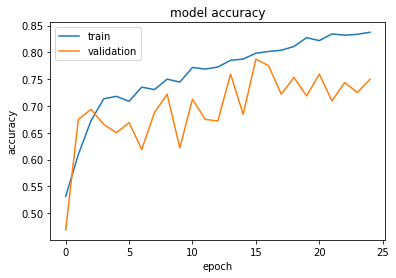

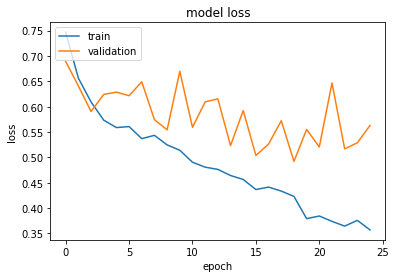

In [21]:


print(history_1_1.history.keys())

pyplot.plot(history_1_1.history['accuracy'])
pyplot.plot(history_1_1.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

pyplot.plot(history_1_1.history['loss'])
pyplot.plot(history_1_1.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

**Plot Image Model 2**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


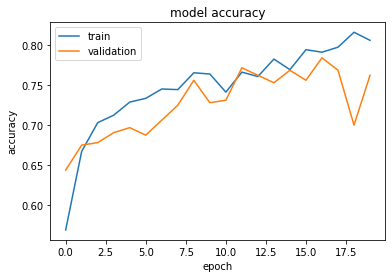

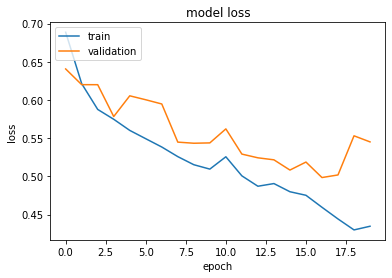

In [22]:



print(history_1_2.history.keys())

pyplot.plot(history_1_2.history['accuracy'])
pyplot.plot(history_1_2.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

pyplot.plot(history_1_2.history['loss'])
pyplot.plot(history_1_2.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

**Plot Image Model 3**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


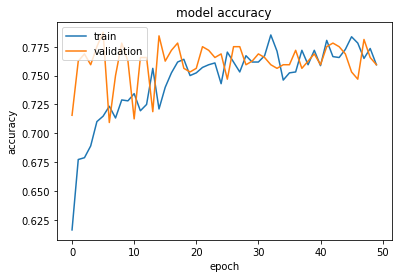

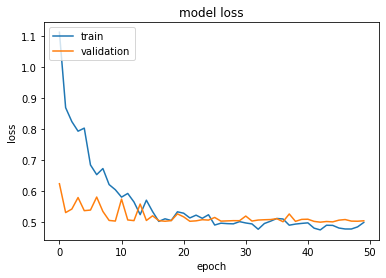

In [80]:

print(history_1_3.history.keys())

pyplot.plot(history_1_3.history['accuracy'])
pyplot.plot(history_1_3.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

pyplot.plot(history_1_3.history['loss'])
pyplot.plot(history_1_3.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

#################################################################

**Train Best Image Model**

In [81]:
input_images = keras.layers.Input(shape=(2048), name='images')

dense = keras.layers.Dropout(0.7)(input_images)
dense = keras.layers.Dense(64)(dense)
dense = keras.layers.Dropout(0.3)(dense)

dense = keras.layers.Dense(1)(dense)

acti = keras.layers.Activation('sigmoid')(dense)

func_model_images = keras.Model(input_images, acti)

func_model_images.summary()
    
print('------------------------------------------------------------------------')


func_model_images.compile(optimizer=Adam(),
            loss='binary_crossentropy',
            metrics=['accuracy'])
  
checkpoint_filepath = path + '/tmp/checkpoint_img'

metric = 'accuracy'
callback = keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor=metric, mode='max', verbose=1, save_best_only=True)


print('------------------------------------------------------------------------')

history_1 = func_model_images.fit(embedd_image_train,y_train,
  epochs=8, verbose='auto', 
  callbacks=[callback])


Model: "model_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 images (InputLayer)         [(None, 2048)]            0         
                                                                 
 dropout_171 (Dropout)       (None, 2048)              0         
                                                                 
 dense_223 (Dense)           (None, 64)                131136    
                                                                 
 dropout_172 (Dropout)       (None, 64)                0         
                                                                 
 dense_224 (Dense)           (None, 1)                 65        
                                                                 
 activation_104 (Activation)  (None, 1)                0         
                                                                 
Total params: 131,201
Trainable params: 131,201
Non-train

**Test Best Image Model**

13/13 [==============================] - 0s 2ms/step

Accuracy: 0.774436
Precision: 0.783920
Recall: 0.768473
F1 score: 0.776119

Confusion matrix:


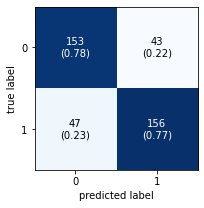

In [82]:

model = keras.models.load_model(path + '/tmp/checkpoint_img')


predictions = model.predict({'images': embedd_image_test}, verbose=1)
data = []
i = 0
for prediction in predictions:
    temp = 0
    if prediction >= 0.5:
        temp = 1
    data.append(temp)
    i = i + 1

mat = confusion_matrix(y_test_embedd, data)

print()

plot_confusion_matrix(conf_mat=mat, figsize=(3, 3), show_normed=True)

accuracy = sklearn.metrics.accuracy_score(y_test_embedd, data)
print('Accuracy: %f' % accuracy)

precision = sklearn.metrics.precision_score(y_test_embedd, data)
print('Precision: %f' % precision)

recall = sklearn.metrics.recall_score(y_test_embedd, data)
print('Recall: %f' % recall)

f1 = sklearn.metrics.f1_score(y_test_embedd, data)
print('F1 score: %f' % f1)


print()
print("Confusion matrix:")
mat = confusion_matrix(y_test_embedd, data)




########################################

**Features Model**

########################################

**Build Featuras Model 1**


In [96]:


kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []



for train, test in kfold.split(engagement_column_train):

  input_text = keras.layers.Input(shape=(text_data_max_length, ), name='text')
  input_features = keras.layers.Input(shape=(67,), name='features')

  text_embed = keras.layers.Embedding(vocab_size, embedding_dim,
                                weights=[embedding_matrix], 
                                input_length=text_data_max_length, 
                                trainable=False)(input_text)

  x = keras.layers.SpatialDropout1D(0.5)(text_embed)

  x = keras.layers.Conv1D(32, 3, activation='relu')(x)
  x = keras.layers.MaxPooling1D(pool_size=5)(x)


  text_features = keras.layers.Flatten()(x)

  conc = keras.layers.concatenate([text_features, input_features])

  dense = keras.layers.Dropout(0.5)(conc)
  dense = keras.layers.Dense(64)(dense)
  dense = keras.layers.Dropout(0.3)(dense)


  dense = keras.layers.Dense(1)(dense)

  acti = keras.layers.Activation('sigmoid')(dense)

  func_model_features_1 = keras.Model([input_text, input_features], acti)


  if fold_no == 1:
    func_model_features_1.summary()
    
    print('------------------------------------------------------------------------')



  func_model_features_1.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  
  fold_n = "/fold" + str(fold_no)
  checkpoint_filepath = path + '/tmp/checkpoint_feat_1' + fold_n

  metric = 'val_accuracy'
  callback = keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor=metric, mode='max', verbose=1, save_best_only=False)


  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history_2_1 = func_model_features_1.fit(
    x={'text':x_train_text[train], 'features':x_train_features[train]},
    y=y_train[train],
    epochs=10, verbose='auto', 
    validation_data=({'text':x_train_text[test], 'features':x_train_features[test]}, y_train[test]), callbacks=[callback])
  
  scores = func_model_features_1.evaluate({'text':x_train_text[test], 'features':x_train_features[test]}, y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {func_model_features_1.metrics_names[0]} of {scores[0]}; {func_model_features_1.metrics_names[1]} of {scores[1]}')
  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1


Model: "model_135"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None, 50)]         0           []                               
                                                                                                  
 embedding_30 (Embedding)       (None, 50, 300)      2273100     ['text[0][0]']                   
                                                                                                  
 spatial_dropout1d_30 (SpatialD  (None, 50, 300)     0           ['embedding_30[0][0]']           
 ropout1D)                                                                                        
                                                                                                  
 conv1d_30 (Conv1D)             (None, 48, 32)       28832       ['spatial_dropout1d_30[0]

**Cross Validation Featuras Model 1**

In [97]:

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.551555335521698 - Accuracy: 0.7281249761581421
------------------------------------------------------------------------
> Fold 2 - Loss: 0.5298953652381897 - Accuracy: 0.731249988079071
------------------------------------------------------------------------
> Fold 3 - Loss: 0.5497488975524902 - Accuracy: 0.7437499761581421
------------------------------------------------------------------------
> Fold 4 - Loss: 0.5164955854415894 - Accuracy: 0.7281249761581421
------------------------------------------------------------------------
> Fold 5 - Loss: 0.522071897983551 - Accuracy: 0.765625
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.7393749833106995 (+- 0.014334188557312198)
> Loss: 0.5339534163475037
--------------------------------------

####################################################################

**Build Features 2**


In [109]:


kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []



for train, test in kfold.split(engagement_column_train):

  input_text = keras.layers.Input(shape=(text_data_max_length, ), name='text')
  input_features = keras.layers.Input(shape=(67,), name='features')

  text_embed = keras.layers.Embedding(vocab_size, embedding_dim,
                                weights=[embedding_matrix], 
                                input_length=text_data_max_length, 
                                trainable=False)(input_text)

  x = keras.layers.SpatialDropout1D(0.2)(text_embed)

  x = keras.layers.Conv1D(16, 3, activation='relu')(x)
  x = keras.layers.MaxPooling1D(pool_size=10)(x)

  x = keras.layers.Conv1D(16, 3, activation='relu')(x)
  x = keras.layers.MaxPooling1D(pool_size=2)(x)

  text_features = keras.layers.Flatten()(x)

  conc = keras.layers.concatenate([text_features, input_features])

  dense = keras.layers.Dropout(0.5)(conc)
  dense = keras.layers.Dense(16)(dense)
  dense = keras.layers.Dropout(0.3)(dense)


  dense = keras.layers.Dense(1)(dense)

  acti = keras.layers.Activation('sigmoid')(dense)

  func_model_features_2 = keras.Model([input_text, input_features], acti)


  if fold_no == 1:
    func_model_features_2.summary()
    
    print('------------------------------------------------------------------------')



  func_model_features_2.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  
  fold_n = "/fold" + str(fold_no)
  checkpoint_filepath = path + '/tmp/checkpoint_feat_2' + fold_n

  metric = 'val_accuracy'
  callback = keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor=metric, mode='max', verbose=1, save_best_only=False)


  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history_2_2 = func_model_features_2.fit(
    x={'text':x_train_text[train], 'features':x_train_features[train]},
    y=y_train[train],
    epochs=12, verbose='auto', 
    validation_data = ({'text':x_train_text[test], 'features':x_train_features[test]}, y_train[test]), callbacks=[callback])
  
  scores = func_model_features_2.evaluate({'text':x_train_text[test], 'features':x_train_features[test]}, y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {func_model_features_2.metrics_names[0]} of {scores[0]}; {func_model_features_2.metrics_names[1]} of {scores[1]}%')
  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1

Model: "model_148"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None, 50)]         0           []                               
                                                                                                  
 embedding_43 (Embedding)       (None, 50, 300)      2273100     ['text[0][0]']                   
                                                                                                  
 spatial_dropout1d_43 (SpatialD  (None, 50, 300)     0           ['embedding_43[0][0]']           
 ropout1D)                                                                                        
                                                                                                  
 conv1d_50 (Conv1D)             (None, 48, 16)       14416       ['spatial_dropout1d_43[0]

**Cross Validation Features Model 2**

In [110]:

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.5454359650611877 - Accuracy: 0.731249988079071
------------------------------------------------------------------------
> Fold 2 - Loss: 0.5635732412338257 - Accuracy: 0.7124999761581421
------------------------------------------------------------------------
> Fold 3 - Loss: 0.5866557955741882 - Accuracy: 0.7281249761581421
------------------------------------------------------------------------
> Fold 4 - Loss: 0.5705175399780273 - Accuracy: 0.703125
------------------------------------------------------------------------
> Fold 5 - Loss: 0.5639997720718384 - Accuracy: 0.7124999761581421
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.7174999833106994 (+- 0.010569705694791941)
> Loss: 0.5660364627838135
------------------------------------

###################################################################

**Plot Features Model 1**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


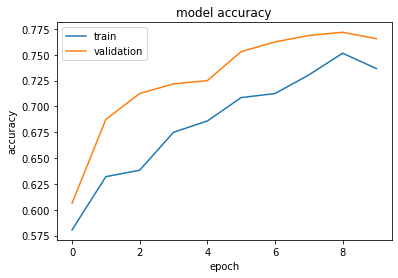

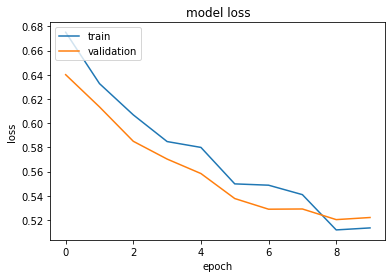

In [104]:
print(history_2_1.history.keys())

pyplot.plot(history_2_1.history['accuracy'])
pyplot.plot(history_2_1.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

pyplot.plot(history_2_1.history['loss'])
pyplot.plot(history_2_1.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

**Plot Features Model 2**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


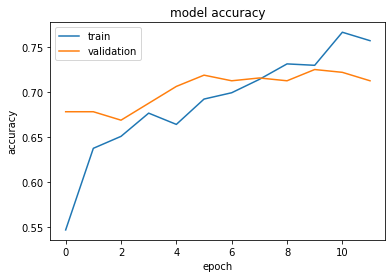

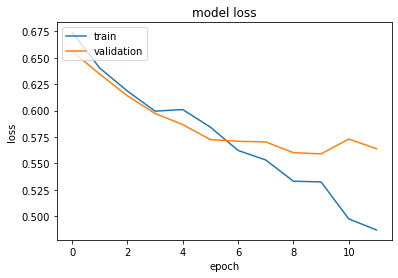

In [111]:
print(history_2_2.history.keys())

pyplot.plot(history_2_2.history['accuracy'])
pyplot.plot(history_2_2.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

pyplot.plot(history_2_2.history['loss'])
pyplot.plot(history_2_2.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

####################################################################

**Train Best Features Model**

In [107]:
input_text = keras.layers.Input(shape=(text_data_max_length, ), name='text')
input_features = keras.layers.Input(shape=(67,), name='features')

text_embed = keras.layers.Embedding(vocab_size, embedding_dim,
                                weights=[embedding_matrix], 
                                input_length=text_data_max_length, 
                                trainable=False)(input_text)

x = keras.layers.SpatialDropout1D(0.5)(text_embed)

x = keras.layers.Conv1D(32, 3, activation='relu')(x)
x = keras.layers.MaxPooling1D(pool_size=5)(x)


text_features = keras.layers.Flatten()(x)

conc = keras.layers.concatenate([text_features, input_features])

dense = keras.layers.Dropout(0.5)(conc)
dense = keras.layers.Dense(64)(dense)
dense = keras.layers.Dropout(0.3)(dense)

dense = keras.layers.Dense(1)(dense)

acti = keras.layers.Activation('sigmoid')(dense)

func_model_features = keras.Model([input_text, input_features], acti)



func_model_features.summary()
    
print('------------------------------------------------------------------------')


func_model_features.compile(optimizer=Adam(),
            loss='binary_crossentropy',
            metrics=['accuracy'])

checkpoint_filepath = path + '/tmp/checkpoint_feat'

metric = 'accuracy'
callback = keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor=metric, mode='max', verbose=1, save_best_only=False)


print('------------------------------------------------------------------------')

history_2 = func_model_features.fit(
  x={'text':x_train_text, 'features':x_train_features},
  y=y_train,
  epochs=12, verbose='auto', 
  callbacks=[callback])

Model: "model_147"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None, 50)]         0           []                               
                                                                                                  
 embedding_42 (Embedding)       (None, 50, 300)      2273100     ['text[0][0]']                   
                                                                                                  
 spatial_dropout1d_42 (SpatialD  (None, 50, 300)     0           ['embedding_42[0][0]']           
 ropout1D)                                                                                        
                                                                                                  
 conv1d_49 (Conv1D)             (None, 48, 32)       28832       ['spatial_dropout1d_42[0]

**Test Best Features Model**

13/13 [==============================] - 0s 5ms/step

Accuracy: 0.805000
Precision: 0.866279
Recall: 0.730392
F1 score: 0.792553

Confusion matrix:


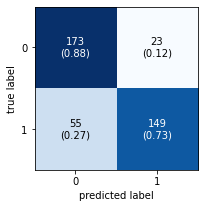

In [108]:
model = keras.models.load_model(path + '/tmp/checkpoint_feat')

x_test_text = np.array(x_test_text)


predictions = model.predict(x={"text":x_test_text, "features":x_test_features}, verbose=1)
data = []
i = 0
for prediction in predictions:
    temp = 0
    if prediction >= 0.5:
        temp = 1
    data.append(temp)
    i = i + 1


mat = confusion_matrix(y_test, data)

print()

plot_confusion_matrix(conf_mat=mat, figsize=(3, 3), show_normed=True)

accuracy = sklearn.metrics.accuracy_score(y_test, data)
print('Accuracy: %f' % accuracy)

precision = sklearn.metrics.precision_score(y_test, data)
print('Precision: %f' % precision)

recall = sklearn.metrics.recall_score(y_test, data)
print('Recall: %f' % recall)

f1 = sklearn.metrics.f1_score(y_test, data)
print('F1 score: %f' % f1)


print()
print("Confusion matrix:")
mat = confusion_matrix(y_test, data)




########################################

**Image + features Model**

########################################

**Build Final Model 1**


In [19]:
kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []


for train, test in kfold.split(x_train_features):

  input_text = keras.layers.Input(shape=(text_data_max_length, ), name='text')
  input_features = keras.layers.Input(shape=(67,), name='features')
  input_images = keras.layers.Input(shape=(2048), name='images')

  text_embed = keras.layers.Embedding(vocab_size, embedding_dim,
                                weights=[embedding_matrix], 
                                input_length=text_data_max_length, 
                                trainable=False)(input_text)

  x = keras.layers.SpatialDropout1D(0.5)(text_embed)

  x = keras.layers.Conv1D(24, 3, activation='relu')(x)
  x = keras.layers.MaxPooling1D(pool_size=5)(x)


  text_features = keras.layers.Flatten()(x)

  images = keras.layers.Dropout(0.7)(input_images)
  images = keras.layers.Dense(128)(images)
  images = keras.layers.Dropout(0.2)(images)

  features = keras.layers.Dropout(0.2)(input_features)
  features = keras.layers.Dense(4)(features)

  conc = keras.layers.concatenate([text_features, features, images])

  dense = keras.layers.Dropout(0.4)(conc)
  dense = keras.layers.Dense(32)(dense)
  dense = keras.layers.Dropout(0.2)(dense)

  dense = keras.layers.Dense(4)(dense)
  dense = keras.layers.Dropout(0.2)(dense)

  dense = keras.layers.Dense(1)(dense)

  acti = keras.layers.Activation('sigmoid')(dense)

  func_model_final_1 = keras.Model([input_text, input_features,input_images], acti)


  if fold_no == 1:
    func_model_final_1.summary()    
    print('------------------------------------------------------------------------')



  func_model_final_1.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  
  fold_n = "/fold" + str(fold_no)
  checkpoint_filepath = path + '/tmp/checkpoint_final_1' + fold_n

  metric = 'val_accuracy'
  callback = keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor=metric, mode='max', verbose=1, save_best_only=False)


  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history_3_1 = func_model_final_1.fit(
    x={'text':x_train_text[train], 'features':x_train_features[train], 'images':embedd_image_train[train]},
    y=y_train[train],
    epochs=35, verbose='auto', 
    validation_data=({'text':x_train_text[test], 'features':x_train_features[test], 'images':embedd_image_train[test]}, y_train[test]), callbacks=[callback])
  
  scores = func_model_final_1.evaluate({'text':x_train_text[test], 'features':x_train_features[test], 'images':embedd_image_train[test]}, y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {func_model_final_1.metrics_names[0]} of {scores[0]}; {func_model_final_1.metrics_names[1]} of {scores[1]}')
  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1




Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None, 50)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 50, 300)      2273100     ['text[0][0]']                   
                                                                                                  
 spatial_dropout1d_2 (SpatialDr  (None, 50, 300)     0           ['embedding_2[0][0]']            
 opout1D)                                                                                         
                                                                                                  
 images (InputLayer)            [(None, 2048)]       0           []                         

**Cross Validation Final Model 1**

In [20]:

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.3928939700126648 - Accuracy: 0.8125
------------------------------------------------------------------------
> Fold 2 - Loss: 0.46842366456985474 - Accuracy: 0.7906249761581421
------------------------------------------------------------------------
> Fold 3 - Loss: 0.388723760843277 - Accuracy: 0.824999988079071
------------------------------------------------------------------------
> Fold 4 - Loss: 0.431366503238678 - Accuracy: 0.8125
------------------------------------------------------------------------
> Fold 5 - Loss: 0.3921840786933899 - Accuracy: 0.828125
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.8137499928474426 (+- 0.013199201373306506)
> Loss: 0.41471839547157285
------------------------------------------------------------

**Build Final Model 2**


In [17]:
kfold = KFold(n_splits=5, shuffle=True)

fold_no = 1
acc_per_fold = []
loss_per_fold = []



for train, test in kfold.split(x_train_features):

  input_text = keras.layers.Input(shape=(text_data_max_length, ), name='text')
  input_features = keras.layers.Input(shape=(67,), name='features')
  input_images = keras.layers.Input(shape=(2048), name='images')

  text_embed = keras.layers.Embedding(vocab_size, embedding_dim,
                                weights=[embedding_matrix], 
                                input_length=text_data_max_length, 
                                trainable=False)(input_text)

  x = keras.layers.SpatialDropout1D(0.5)(text_embed)

  x = keras.layers.Conv1D(16, 3, activation='relu')(x)
  x = keras.layers.MaxPooling1D(pool_size=10)(x)


  text = keras.layers.Flatten()(x)


  conc = keras.layers.concatenate([text, input_features, input_images])

  dense = keras.layers.Dropout(0.6)(conc) 
  dense = keras.layers.Dense(256)(dense)
  dense = keras.layers.Dropout(0.2)(dense)

  # dense = keras.layers.Dense(32)(dense)
  # dense = keras.layers.Dropout(0.2)(dense)

  dense = keras.layers.Dense(16)(dense)
  dense = keras.layers.Dropout(0.2)(dense)

  dense = keras.layers.Dense(1)(dense)

  acti = keras.layers.Activation('sigmoid')(dense)

  func_model_final_2 = keras.Model([input_text, input_features,input_images], acti)


  if fold_no == 1:
    func_model_final_2.summary()    
    print('------------------------------------------------------------------------')


  func_model_final_2.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  
  fold_n = "/fold" + str(fold_no)
  checkpoint_filepath = path + '/tmp/checkpoint_final_2' + fold_n

  metric = 'val_accuracy'
  callback = keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor=metric, mode='max', verbose=1, save_best_only=False)


  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history_3_2 = func_model_final_2.fit(
    x={'text':x_train_text[train], 'features':x_train_features[train], 'images':embedd_image_train[train]},
    y=y_train[train],
    epochs=35, verbose='auto', 
    validation_data=({'text':x_train_text[test], 'features':x_train_features[test], 'images':embedd_image_train[test]}, y_train[test]), callbacks=[callback])
  
  scores = func_model_final_2.evaluate({'text':x_train_text[test], 'features':x_train_features[test], 'images':embedd_image_train[test]}, y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {func_model_final_2.metrics_names[0]} of {scores[0]}; {func_model_final_2.metrics_names[1]} of {scores[1]}')
  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])

  fold_no = fold_no + 1

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 300)      2273100     ['text[0][0]']                   
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 50, 300)     0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 conv1d (Conv1D)                (None, 48, 16)       14416       ['spatial_dropout1d[0][0]']  

**Cross Validation Final Model 2**

In [18]:

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.4625823497772217 - Accuracy: 0.7718750238418579
------------------------------------------------------------------------
> Fold 2 - Loss: 0.45690497756004333 - Accuracy: 0.796875
------------------------------------------------------------------------
> Fold 3 - Loss: 0.46564358472824097 - Accuracy: 0.784375011920929
------------------------------------------------------------------------
> Fold 4 - Loss: 0.47022780776023865 - Accuracy: 0.78125
------------------------------------------------------------------------
> Fold 5 - Loss: 0.42725858092308044 - Accuracy: 0.8218749761581421
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.7912500023841857 (+- 0.017275328951442206)
> Loss: 0.456523460149765
--------------------------------------------

**Plot Final Model 1**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


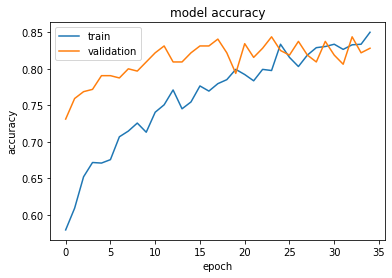

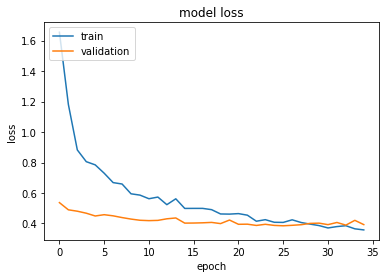

In [26]:
print(history_3_1.history.keys())

pyplot.plot(history_3_1.history['accuracy'])
pyplot.plot(history_3_1.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

pyplot.plot(history_3_1.history['loss'])
pyplot.plot(history_3_1.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

**Plot Final Model 2**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


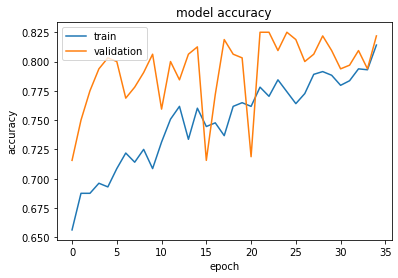

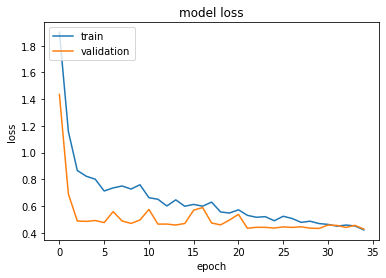

In [19]:
print(history_3_2.history.keys())

pyplot.plot(history_3_2.history['accuracy'])
pyplot.plot(history_3_2.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

pyplot.plot(history_3_2.history['loss'])
pyplot.plot(history_3_2.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

**Train Best Final Model**

In [21]:
input_text = keras.layers.Input(shape=(text_data_max_length, ), name='text')
input_features = keras.layers.Input(shape=(67,), name='features')
input_images = keras.layers.Input(shape=(2048), name='images')

text_embed = keras.layers.Embedding(vocab_size, embedding_dim,
                                weights=[embedding_matrix], 
                                input_length=text_data_max_length, 
                                trainable=False)(input_text)

x = keras.layers.SpatialDropout1D(0.5)(text_embed)

x = keras.layers.Conv1D(24, 3, activation='relu')(x)
x = keras.layers.MaxPooling1D(pool_size=5)(x)


text_features = keras.layers.Flatten()(x)

images = keras.layers.Dropout(0.7)(input_images)
images = keras.layers.Dense(128)(images)
images = keras.layers.Dropout(0.2)(images)

features = keras.layers.Dropout(0.2)(input_features)
features = keras.layers.Dense(4)(features)

conc = keras.layers.concatenate([text_features, features, images])

dense = keras.layers.Dropout(0.4)(conc)
dense = keras.layers.Dense(32)(dense)
dense = keras.layers.Dropout(0.2)(dense)

dense = keras.layers.Dense(4)(dense)
dense = keras.layers.Dropout(0.2)(dense)

dense = keras.layers.Dense(1)(dense)

acti = keras.layers.Activation('sigmoid')(dense)

func_model_final = keras.Model([input_text, input_features,input_images], acti)



func_model_final.summary()    
print('------------------------------------------------------------------------')



func_model_final.compile(optimizer=Adam(),
            loss='binary_crossentropy',
            metrics=['accuracy'])
  

checkpoint_filepath = path + '/tmp/checkpoint_final'

metric = 'accuracy'
callback = keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor=metric, mode='max', verbose=1, save_best_only=False)

print('------------------------------------------------------------------------')
print(f'Training for fold {fold_no} ...')

history_3_1 = func_model_final.fit(
  x={'text':x_train_text, 'features':x_train_features, 'images':embedd_image_train},
  y=y_train,
  epochs=35, verbose='auto', 
  callbacks=[callback])

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None, 50)]         0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 50, 300)      2273100     ['text[0][0]']                   
                                                                                                  
 spatial_dropout1d_6 (SpatialDr  (None, 50, 300)     0           ['embedding_6[0][0]']            
 opout1D)                                                                                         
                                                                                                  
 images (InputLayer)            [(None, 2048)]       0           []                         

**Test Best Final Model**

13/13 [==============================] - 0s 6ms/step

Accuracy: 0.854637
Precision: 0.883598
Recall: 0.822660
F1 score: 0.852041

Confusion matrix:


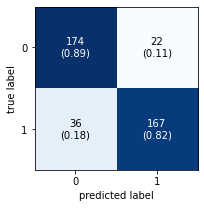

In [22]:
del = keras.models.load_model(path + '/tmp/checkpoint_final')


x_test_text = np.array(x_test_text)

predictions = model.predict({"text":x_test_text_embedd, "features":x_test_features_embedd,'images': embedd_image_test}, verbose=1)
data = []
i = 0
for prediction in predictions:
    temp = 0
    if prediction >= 0.5:
        temp = 1
    data.append(temp)
    i = i + 1

mat = confusion_matrix(y_test_embedd, data)

print()

plot_confusion_matrix(conf_mat=mat, figsize=(3, 3), show_normed=True)

accuracy = sklearn.metrics.accuracy_score(y_test_embedd, data)
print('Accuracy: %f' % accuracy)

precision = sklearn.metrics.precision_score(y_test_embedd, data)
print('Precision: %f' % precision)

recall = sklearn.metrics.recall_score(y_test_embedd, data)
print('Recall: %f' % recall)

f1 = sklearn.metrics.f1_score(y_test_embedd, data)
print('F1 score: %f' % f1)


print()
print("Confusion matrix:")
mat = confusion_matrix(y_test_embedd, data)
